In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist


In [3]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten images for clustering
x_train_flat = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test_flat = x_test.reshape((x_test.shape[0], -1)) / 255.0

print("Training data shape:", x_train_flat.shape)
print("Test data shape:", x_test_flat.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [4]:
num_labeled = 50

# Randomly select labeled indices
np.random.seed(42)
labeled_indices = np.random.choice(range(len(x_train_flat)), num_labeled, replace=False)

# Split labeled and unlabeled data
x_labeled = x_train_flat[labeled_indices]
y_labeled = y_train[labeled_indices]

x_unlabeled = np.delete(x_train_flat, labeled_indices, axis=0)
y_unlabeled = np.delete(y_train, labeled_indices, axis=0)

print("Labeled data shape:", x_labeled.shape)
print("Unlabeled data shape:", x_unlabeled.shape)


Labeled data shape: (50, 784)
Unlabeled data shape: (59950, 784)


In [5]:
# Combine all data for clustering
x_all = np.vstack((x_labeled, x_unlabeled))

# Cluster into 10 groups (digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_all)

# Predict cluster for all data
cluster_labels = kmeans.labels_


In [6]:
# Map clusters using majority voting from labeled data
cluster_to_label = {}

for i in range(10):
    # Find indices of points in cluster i that are labeled
    labeled_in_cluster = [idx for idx in labeled_indices if cluster_labels[idx] == i]
    if labeled_in_cluster:
        # Assign cluster label as the most common true label
        cluster_to_label[i] = np.bincount(y_train[labeled_in_cluster]).argmax()
    else:
        # If no labeled point in cluster, assign -1 temporarily
        cluster_to_label[i] = -1

# Assign pseudo-labels
pseudo_labels = np.array([cluster_to_label[c] for c in cluster_labels])


In [7]:
# Only evaluate on the initially labeled data
y_pred_labeled = pseudo_labels[labeled_indices]
accuracy = accuracy_score(y_train[labeled_indices], y_pred_labeled)
print("Accuracy on labeled data using clustering:", accuracy)


Accuracy on labeled data using clustering: 0.36


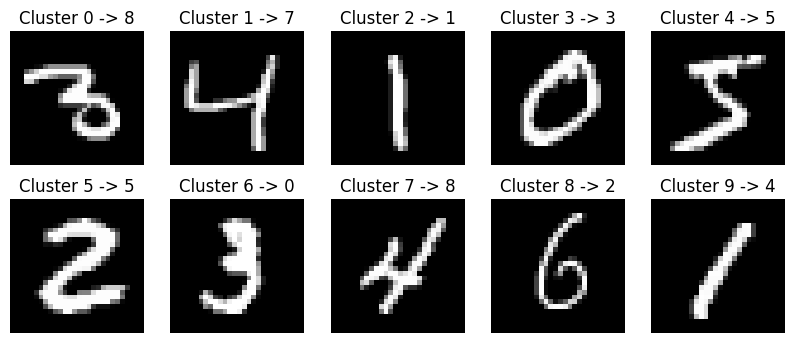

In [8]:
plt.figure(figsize=(10,4))
for i in range(10):
    idx = np.where(cluster_labels == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Cluster {i} -> {pseudo_labels[idx]}")
    plt.axis('off')
plt.show()


Reflection on Clustering for Semi-Supervised Learning:

In this activity, I explored how clustering techniques can support a semi-supervised learning scenario using the MNIST dataset. By assuming that only a small subset of data (50 samples) was labeled, I used KMeans clustering to group similar images and then assigned pseudo-labels to unlabeled data based on the majority label within each cluster. This approach allows us to leverage the structure of the data without needing full supervision.

I observed that clustering works reasonably well when there is a clear separation between classes, as similar digits often group together. However, some clusters may mix digits, which shows the limitation of purely unsupervised clustering. This exercise also highlighted the concept of active learning, where models selectively query labels for the most informative data points to maximize learning efficiency. Overall, clustering combined with semi-supervised labeling is a practical way to reduce labeling effort while still achieving useful predictive performance.